In [2]:
from apportionment import *
from scipy.stats import kstest, norm, expon, gamma, lognorm
import warnings

warnings.filterwarnings("ignore")


In [17]:
# db_file = 'lowest_samples_complete.db'

# years = [2012]

# conn = sqlite3.connect(db_file)
# cur = conn.cursor()
        
# for year in years:
#     cur.execute(f'''CREATE TABLE IF NOT EXISTS tab{year} (
#                 iteration_number INTEGER,
#                 party_number INTEGER,
#                 samples INTEGER,
#                 diff INTEGER
#                 );''')

#     # Read and insert data from CSV
#     with open(f'./raw_data/1m-{year}.csv', 'r') as file:
#         reader = csv.reader(file)
#         next(reader)  # Skip header if exists
#         for i, row in enumerate(reader):
#             cur.execute(f'''INSERT INTO tab{year} (iteration_number, party_number, samples, diff)
#                             VALUES (?, ?, ?, ?);''', row)
        
# # Commit changes and close connection
# conn.commit()
# conn.close()


In [18]:
years = [2012]

for year in years:
    with sqlite3.connect('lowest_samples_complete.db') as conn:
        cur = conn.cursor()

        cur.execute(f'''
            SELECT iteration_number, party_number, MIN(samples) 
            FROM tab{year} 
            WHERE diff > 0 
            GROUP BY iteration_number, party_number;
        ''')

        results = cur.fetchall()

        with open(f'lowest_samples{year}all.csv', 'w', newline='') as csvfile:
            csvwriter = csv.writer(csvfile)
            csvwriter.writerow(['iteration_number', 'party_number', 'lowest_samples'])
            csvwriter.writerows(results)

        exclude_list = ", ".join(map(str, constants.le_exclude[year]))

        cur.execute(f'''
            SELECT iteration_number, party_number, MIN(samples) 
            FROM tab{year} 
            WHERE diff > 0 AND party_number IN ({exclude_list}) 
            GROUP BY iteration_number, party_number;
        ''')
        results = cur.fetchall()


        with open(f'lowest_samples{year}non_el.csv', 'w', newline='') as csvfile:
            csvwriter = csv.writer(csvfile)
            csvwriter.writerow(['iteration_number', 'party_number', 'lowest_samples'])
            csvwriter.writerows(results)

        cur.execute(f'''
            SELECT iteration_number, party_number, MIN(samples) 
            FROM tab{year} 
            WHERE diff > 0 AND party_number not IN ({exclude_list}) 
            GROUP BY iteration_number, party_number;
        ''')
        results = cur.fetchall()


        with open(f'lowest_samples{year}electable.csv', 'w', newline='') as csvfile:
            csvwriter = csv.writer(csvfile)
            csvwriter.writerow(['iteration_number', 'party_number', 'lowest_samples'])
            csvwriter.writerows(results)

    print(f'year {year} done')


year 2012 done


In [5]:

# for year in [2023, 2020, 2016, 2012, 2010, 2006, 2002, 1998, 1994]:
#     for subj in range(constants.subjects[year]):
#         with sqlite3.connect('coalitions.db') as conn:
#             cur = conn.cursor()

#             cur.execute(f'''
#                 SELECT iteration_number, party_number, MIN(samples) 
#                 FROM tab{year}
#                 WHERE diff < 76 AND party_number = {subj}
#                 GROUP BY iteration_number, party_number;
#             ''')

#             results = cur.fetchall()

#             with open(f'./db_exports_specific/coalitions{year}all-{subj}.csv', 'w', newline='') as csvfile:
#                 csvwriter = csv.writer(csvfile)
#                 csvwriter.writerow(['iteration_number', 'party_number', 'lowest_samples'])
#                 csvwriter.writerows(results)

data for subj 16 23305.659102
data for subj 12 6865.8170310000005


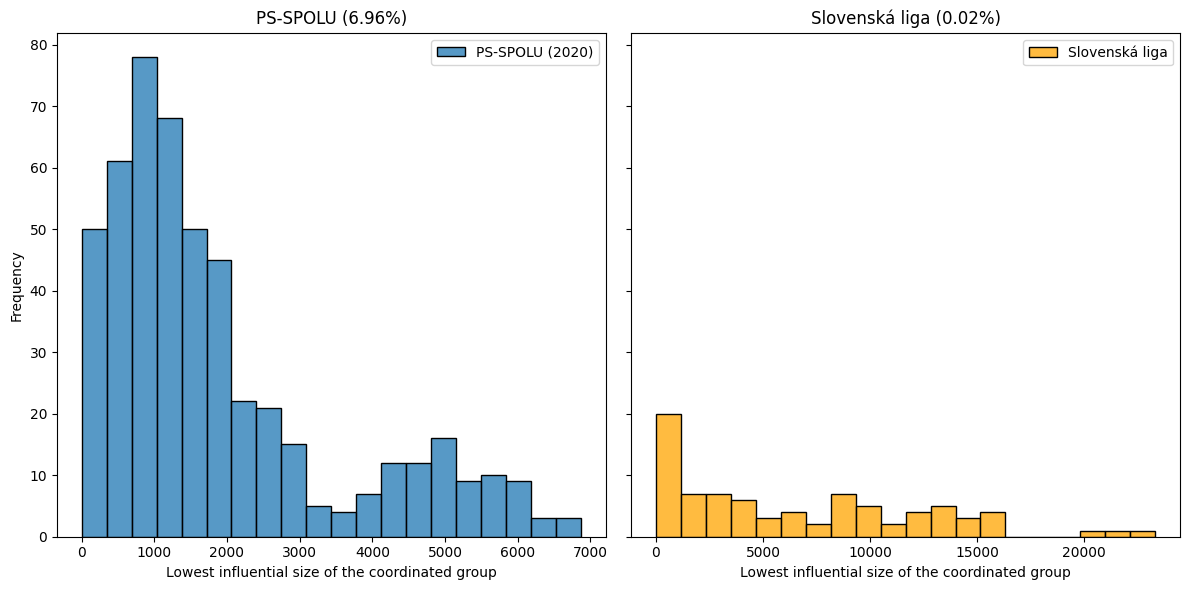

Subject 16 - Slovenská liga. Mean: 6630, Std Dev: 5674
Subject 12 - PS-SPOLU. Mean: 1885, Std Dev: 1602


In [6]:
dfx = pd.read_csv(f'./db_exports_specific/lowest_samples2020all-12.csv', header=0)
df = pd.read_csv(f'./db_exports_specific/lowest_samples2020all-16.csv', header=0)

total_voters_2020 = constants.all_voters[2020]

display_data_df = df["lowest_samples"] * (total_voters_2020 / 1000000)
display_data_dfx = dfx["lowest_samples"] * (total_voters_2020 / 1000000)

print("data for subj 16", max(display_data_df))
print("data for subj 12", max(display_data_dfx))

cumulative_mean_df = np.mean(display_data_df)
cumulative_std_dev_df = np.std(display_data_df)

cumulative_mean_dfx = np.mean(display_data_dfx)
cumulative_std_dev_dfx = np.std(display_data_dfx)

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

sns.histplot(display_data_dfx, ax=axes[0], bins=20, label='PS-SPOLU (2020)')
axes[0].set_xlabel('Lowest influential size of the coordinated group')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[0].set_title(f'PS-SPOLU (6.96%)')

sns.histplot(display_data_df, ax=axes[1], bins=20, label='Slovenská liga', color='orange')
axes[1].set_xlabel('Lowest influential size of the coordinated group')
axes[1].set_ylabel('Frequency')
axes[1].legend()
axes[1].set_title(f'Slovenská liga (0.02%)')

plt.tight_layout()
plt.show()

print(f"Subject 16 - Slovenská liga. Mean: {cumulative_mean_df:.0f}, Std Dev: {cumulative_std_dev_df:.0f}")
print(f"Subject 12 - PS-SPOLU. Mean: {cumulative_mean_dfx:.0f}, Std Dev: {cumulative_std_dev_dfx:.0f}")


data for subj 16 23809.6306
data for subj 3 22185.74796
data for subj 12 19131.093048
data for subj 25 10607.903624


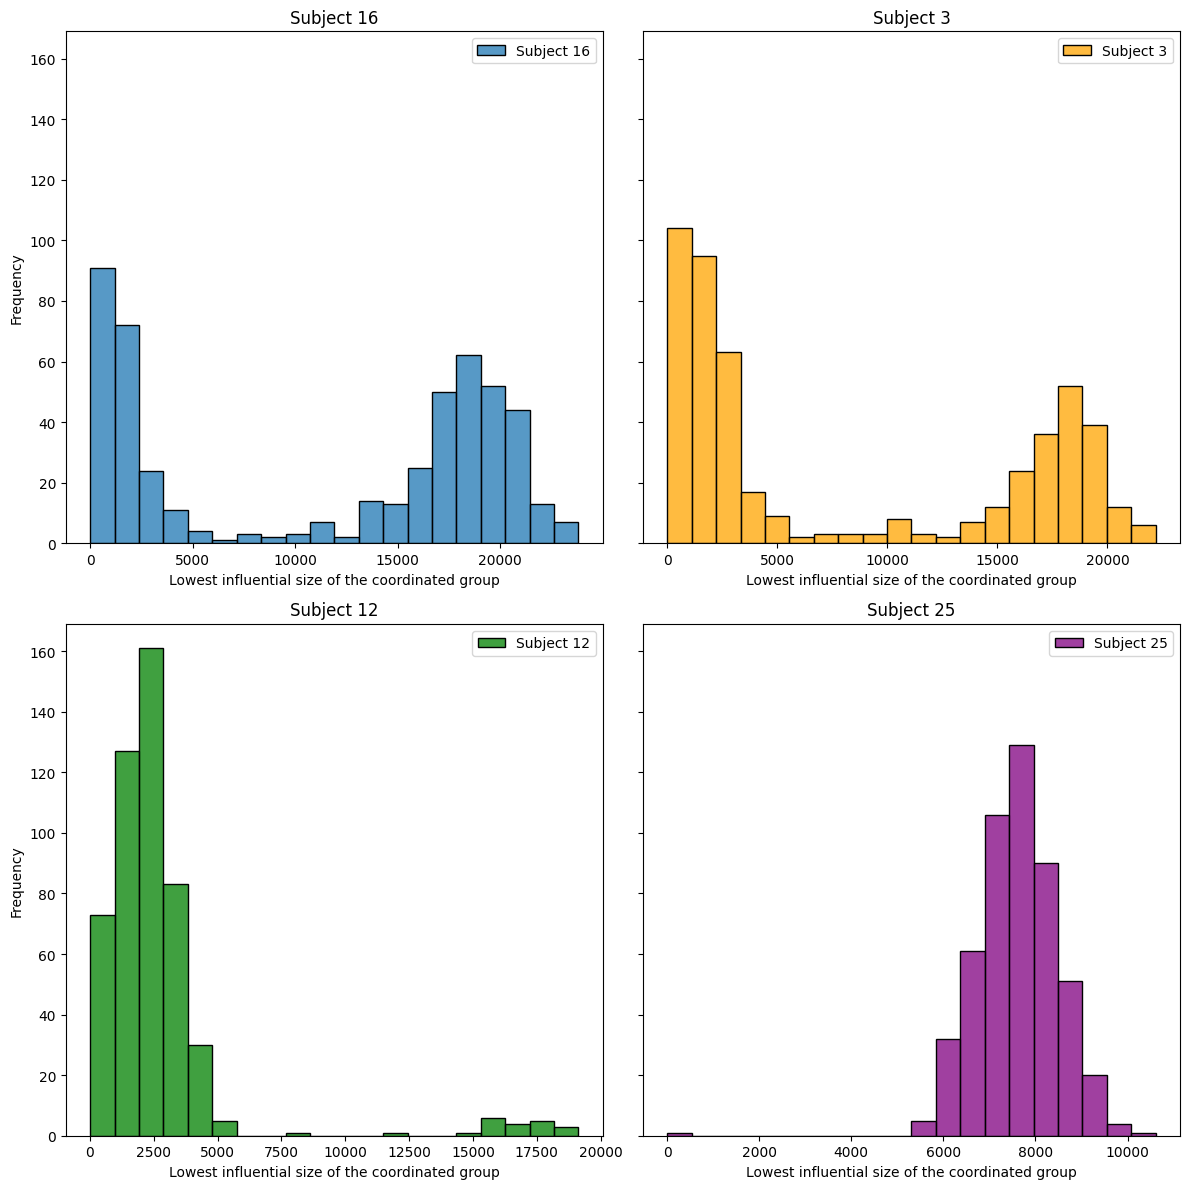

Subject 16. Mean: 11366, Std Dev: 8421
Subject 3. Mean: 8182, Std Dev: 7863
Subject 12. Mean: 2753, Std Dev: 3068
Subject 25. Mean: 7597, Std Dev: 894
Subject 25 norm KS Test: Statistic=0.033, p-value=0.639
Subject 25 expon KS Test: Statistic=0.526, p-value=0.000
Subject 25 gamma KS Test: Statistic=0.084, p-value=0.002
Subject 25 lognorm KS Test: Statistic=0.033, p-value=0.639
Subject 16 norm KS Test: Statistic=0.204, p-value=0.000
Subject 16 expon KS Test: Statistic=0.253, p-value=0.000
Subject 16 gamma KS Test: Statistic=0.207, p-value=0.000
Subject 16 lognorm KS Test: Statistic=0.266, p-value=0.000
Subject 12 norm KS Test: Statistic=0.254, p-value=0.000
Subject 12 expon KS Test: Statistic=0.164, p-value=0.000
Subject 12 gamma KS Test: Statistic=0.998, p-value=0.000
Subject 12 lognorm KS Test: Statistic=0.095, p-value=0.000
Subject 3 norm KS Test: Statistic=0.256, p-value=0.000
Subject 3 expon KS Test: Statistic=0.196, p-value=0.000
Subject 3 gamma KS Test: Statistic=0.186, p-value=0

In [7]:
total_voters_2023 = constants.all_voters[2023]

df16 = pd.read_csv('./db_exports_specific/lowest_samples2023all-16.csv', header=0)
df3 = pd.read_csv('./db_exports_specific/lowest_samples2023all-3.csv', header=0)
df12 = pd.read_csv('./db_exports_specific/lowest_samples2023all-12.csv', header=0)
df25 = pd.read_csv('./db_exports_specific/lowest_samples2023all-25.csv', header=0)

display_data_df16 = df16["lowest_samples"] * (total_voters_2023 / 1000000)
display_data_df3 = df3["lowest_samples"] * (total_voters_2023 / 1000000)
display_data_df12 = df12["lowest_samples"] * (total_voters_2023 / 1000000)
display_data_df25 = df25["lowest_samples"] * (total_voters_2023 / 1000000)

print("data for subj 16", max(display_data_df16))
print("data for subj 3", max(display_data_df3))
print("data for subj 12", max(display_data_df12))
print("data for subj 25", max(display_data_df25))

# Calculate mean and standard deviation
cumulative_mean_df16 = np.mean(display_data_df16)
cumulative_std_dev_df16 = np.std(display_data_df16)

cumulative_mean_df3 = np.mean(display_data_df3)
cumulative_std_dev_df3 = np.std(display_data_df3)

cumulative_mean_df12 = np.mean(display_data_df12)
cumulative_std_dev_df12 = np.std(display_data_df12)

cumulative_mean_df25 = np.mean(display_data_df25)
cumulative_std_dev_df25 = np.std(display_data_df25)

# Perform Kolmogorov-Smirnov test for various distributions
def test_distribution(data, dist_name):
    if dist_name == 'norm':
        params = norm.fit(data)
        return kstest(data, 'norm', args=params)
    elif dist_name == 'expon':
        params = expon.fit(data)
        return kstest(data, 'expon', args=params)
    elif dist_name == 'gamma':
        params = gamma.fit(data)
        return kstest(data, 'gamma', args=params)
    elif dist_name == 'lognorm':
        params = lognorm.fit(data)
        return kstest(data, 'lognorm', args=params)
    else:
        return None

distributions = ['norm', 'expon', 'gamma', 'lognorm']
ks_test_results_25 = {dist: test_distribution(display_data_df25, dist) for dist in distributions}
ks_test_results_16 = {dist: test_distribution(display_data_df16, dist) for dist in distributions}
ks_test_results_12 = {dist: test_distribution(display_data_df12, dist) for dist in distributions}
ks_test_results_3 = {dist: test_distribution(display_data_df3, dist) for dist in distributions}


# Plot histograms
fig, axes = plt.subplots(2, 2, figsize=(12, 12), sharey=True)

sns.histplot(display_data_df16, ax=axes[0, 0], bins=20, label='Subject 16')
axes[0, 0].set_xlabel('Lowest influential size of the coordinated group')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()
axes[0, 0].set_title(f'Subject 16')

sns.histplot(display_data_df3, ax=axes[0, 1], bins=20, label='Subject 3', color='orange')
axes[0, 1].set_xlabel('Lowest influential size of the coordinated group')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()
axes[0, 1].set_title(f'Subject 3')

sns.histplot(display_data_df12, ax=axes[1, 0], bins=20, label='Subject 12', color='green')
axes[1, 0].set_xlabel('Lowest influential size of the coordinated group')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()
axes[1, 0].set_title(f'Subject 12')

sns.histplot(display_data_df25, ax=axes[1, 1], bins=20, label='Subject 25', color='purple')
axes[1, 1].set_xlabel('Lowest influential size of the coordinated group')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()
axes[1, 1].set_title(f'Subject 25')

plt.tight_layout()
plt.show()

# Print mean, standard deviation, and KS test results
print(f"Subject 16. Mean: {cumulative_mean_df16:.0f}, Std Dev: {cumulative_std_dev_df16:.0f}")
print(f"Subject 3. Mean: {cumulative_mean_df3:.0f}, Std Dev: {cumulative_std_dev_df3:.0f}")
print(f"Subject 12. Mean: {cumulative_mean_df12:.0f}, Std Dev: {cumulative_std_dev_df12:.0f}")
print(f"Subject 25. Mean: {cumulative_mean_df25:.0f}, Std Dev: {cumulative_std_dev_df25:.0f}")

for dist, result in ks_test_results_25.items():
    print(f"Subject 25 {dist} KS Test: Statistic={result.statistic:.3f}, p-value={result.pvalue:.3f}")

for dist, result in ks_test_results_16.items():
    print(f"Subject 16 {dist} KS Test: Statistic={result.statistic:.3f}, p-value={result.pvalue:.3f}")

for dist, result in ks_test_results_12.items():
    print(f"Subject 12 {dist} KS Test: Statistic={result.statistic:.3f}, p-value={result.pvalue:.3f}")

for dist, result in ks_test_results_3.items():
    print(f"Subject 3 {dist} KS Test: Statistic={result.statistic:.3f}, p-value={result.pvalue:.3f}")

In [8]:
def load_and_scale_data(subject_number):
    file_path = f'./db_exports_specific/lowest_samples2023all-{subject_number}.csv'
    try:
        df = pd.read_csv(file_path, header=0)
        display_data = df["lowest_samples"] * (constants.all_voters[2023] / 1000000)
        return display_data
    except FileNotFoundError:
        print(f"File not found for subject {subject_number}")
        return None

# Function to perform KS test for various distributions
def test_distribution(data, dist_name):
    if dist_name == 'norm':
        params = norm.fit(data)
        return kstest(data, 'norm', args=params)
    elif dist_name == 'expon':
        params = expon.fit(data)
        return kstest(data, 'expon', args=params)
    elif dist_name == 'gamma':
        params = gamma.fit(data)
        return kstest(data, 'gamma', args=params)
    elif dist_name == 'lognorm':
        params = lognorm.fit(data)
        return kstest(data, 'lognorm', args=params)
    else:
        return None

# Test distributions for subjects 0 to 25
distributions = ['norm', 'expon', 'gamma', 'lognorm']

for subject_number in range(26):
    data = load_and_scale_data(subject_number)
    if data is not None:
        print(f"\nSubject {subject_number} Distribution Tests:")
        for dist in distributions:
            try:
                result = test_distribution(data, dist)
                if result.pvalue > 0.05: print(f"{dist} KS Test: Statistic={result.statistic:.3f}, p-value={result.pvalue:.3f}")
            except:
                pass


Subject 0 Distribution Tests:
lognorm KS Test: Statistic=0.503, p-value=0.993

Subject 1 Distribution Tests:
lognorm KS Test: Statistic=0.503, p-value=0.993

Subject 2 Distribution Tests:
lognorm KS Test: Statistic=0.503, p-value=0.993

Subject 3 Distribution Tests:

Subject 4 Distribution Tests:
lognorm KS Test: Statistic=0.503, p-value=0.994

Subject 5 Distribution Tests:

Subject 6 Distribution Tests:
lognorm KS Test: Statistic=0.503, p-value=0.993

Subject 7 Distribution Tests:
lognorm KS Test: Statistic=0.502, p-value=0.995

Subject 8 Distribution Tests:
lognorm KS Test: Statistic=0.505, p-value=0.991

Subject 9 Distribution Tests:
lognorm KS Test: Statistic=0.503, p-value=0.994

Subject 10 Distribution Tests:
lognorm KS Test: Statistic=0.503, p-value=0.994

Subject 11 Distribution Tests:
lognorm KS Test: Statistic=0.503, p-value=0.993

Subject 12 Distribution Tests:

Subject 13 Distribution Tests:

Subject 14 Distribution Tests:
lognorm KS Test: Statistic=0.503, p-value=0.993

S

[(1, 0.5235058131784762, 500), (2, 0.22711975232954063, 500), (3, 0.5992575979276846, 500), (4, 0.7906504132171255, 500), (5, 0.8018624625264379, 500), (6, 0.5350460021815052, 500), (7, 0.35274363552130816, 500), (8, 0.5816013866051133, 500), (9, 0.9058582200862499, 500), (10, 0.6158868597153966, 500), (11, 0.7545160083998674, 500), (12, 0.879328854901881, 500), (13, 0.561680964290757, 500), (14, 0.6338144716143947, 500), (15, 0.6134128503177221, 498), (16, 0.9265362509163401, 500), (17, 0.9890907774065432, 500), (18, 0.6681386857671605, 500), (20, 0.5224533341739694, 500), (21, 0.756870697068202, 500), (22, 0.9426148569529444, 500), (23, 0.5135252497148568, 500), (24, 0.5085708023794073, 500), (25, 0.9955908330065448, 500), (26, 0.48191136234936305, 500)]


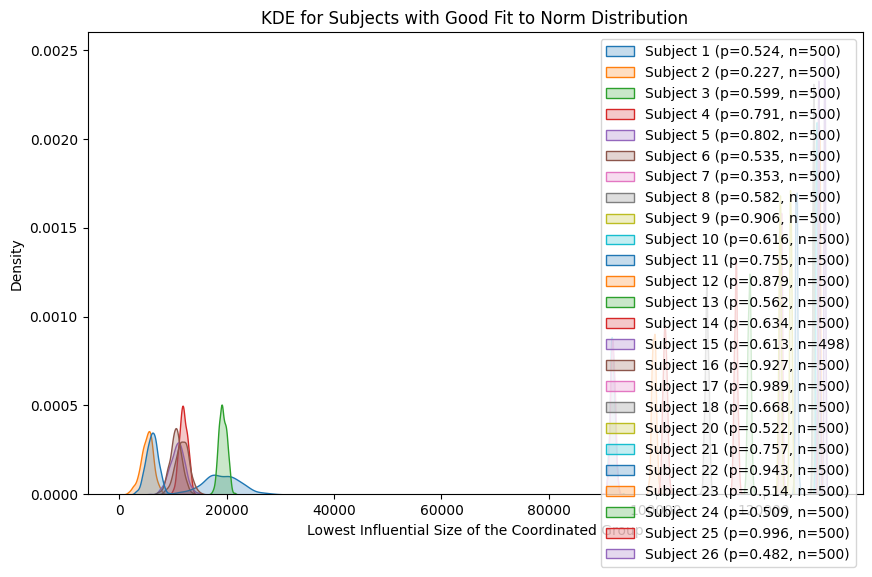

[(1, 0.7022730534147006, 500), (2, 0.10829947737153967, 500), (3, 0.6727251225173474, 500), (4, 0.787718846911291, 500), (5, 0.6141494747576052, 500), (6, 0.44230824633905685, 500), (7, 0.3017164804714175, 500), (8, 0.5467848750342778, 500), (9, 0.905764845436972, 500), (10, 0.7264144084717166, 500), (11, 0.6942525663107554, 500), (12, 0.8197480738692422, 500), (13, 0.5482012541707688, 500), (14, 0.4353963808147384, 500), (15, 0.8126352519179245, 498), (16, 0.8304584179411737, 500), (17, 0.9549933024935087, 500), (18, 0.8052156784779577, 500), (20, 0.6200193182584486, 500), (21, 0.732577328587507, 500), (22, 0.8799735576146385, 500), (23, 0.3611830006200759, 500), (24, 0.5591834895004684, 500), (25, 0.9956339233471632, 500), (26, 0.7243933844607724, 500)]


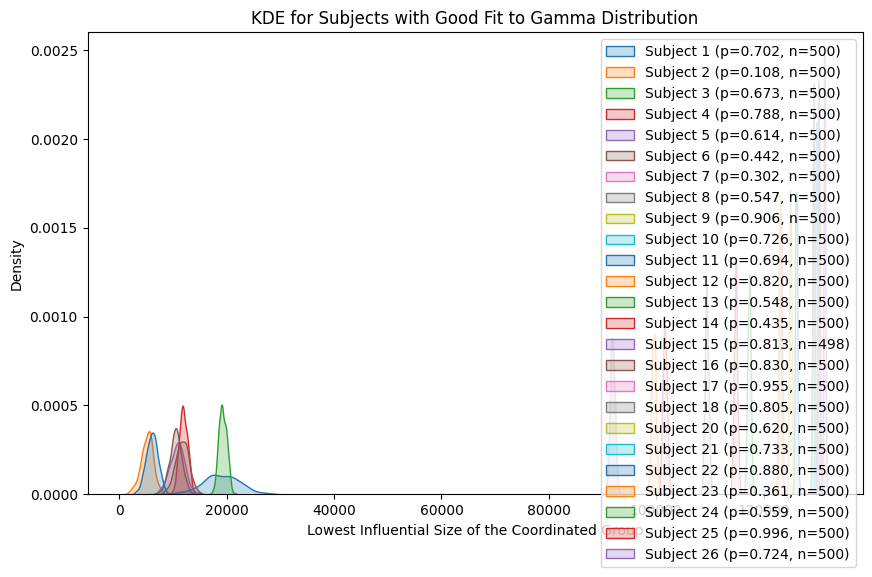

[(1, 0.6999401393079184, 500), (2, 0.22697336482508212, 500), (3, 0.6735781262347678, 500), (4, 0.7906333572927369, 500), (5, 0.8018476968629271, 500), (6, 0.5349729425873845, 500), (7, 0.352658733689856, 500), (8, 0.5558018673381491, 500), (9, 0.9059166849004722, 500), (10, 0.7353638048270007, 500), (11, 0.7545969759568629, 500), (12, 0.816971687956921, 500), (13, 0.5616484581227663, 500), (14, 0.43521129953051996, 500), (15, 0.8147652192497244, 498), (16, 0.9263853162396296, 500), (17, 0.9890893623368712, 500), (18, 0.6682943933316694, 500), (20, 0.6375781686351636, 500), (21, 0.7568051129811875, 500), (22, 0.9424983183690793, 500), (23, 0.5135175312886839, 500), (24, 0.5596111949972495, 500), (25, 0.9955929152886028, 500), (26, 0.7279676709862772, 500)]


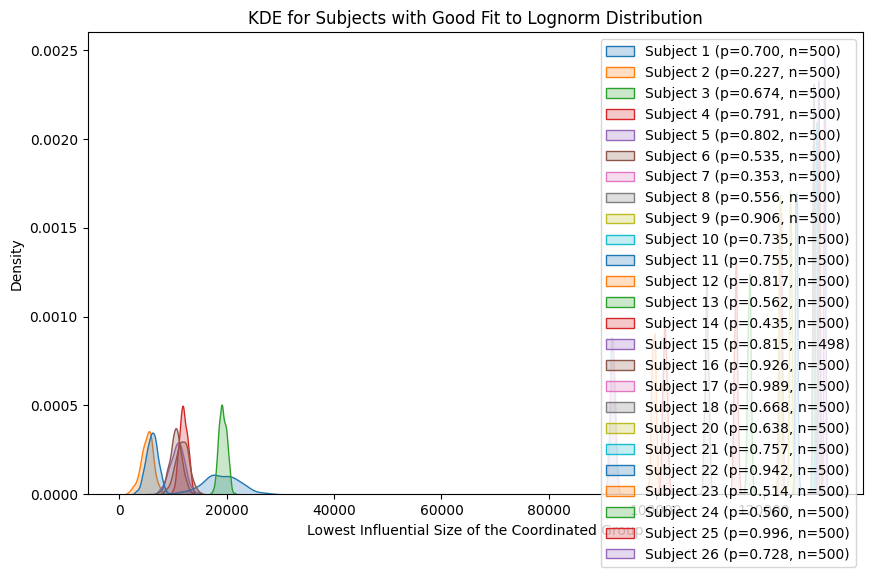

In [9]:
year = 2012

def load_and_scale_data(subject_number):
    file_path = f'./db_exports_specific/lowest_samples{year}all-{subject_number}.csv'
    try:
        df = pd.read_csv(file_path, header=0)
        display_data = df["lowest_samples"] * (constants.all_voters[year] / 1000000)
        return display_data
    except FileNotFoundError:
        print(f"File not found for subject {subject_number}")
        return None

# Function to perform KS test for various distributions
def test_distribution(data, dist_name):
    try:
        if dist_name == 'norm':
            params = norm.fit(data)
            return kstest(data, 'norm', args=params)
        elif dist_name == 'expon':
            params = expon.fit(data)
            return kstest(data, 'expon', args=params)
        elif dist_name == 'gamma':
            params = gamma.fit(data)
            return kstest(data, 'gamma', args=params)
        elif dist_name == 'lognorm':
            params = lognorm.fit(data)
            return kstest(data, 'lognorm', args=params)
        else:
            return None
    except Exception as e:
        # print(f"FitError for {dist_name} distribution: {e}")
        return None

# Define p-value threshold for good fitting
p_value_threshold = 0.05

# Test distributions for subjects 0 to 25
distributions = ['norm', 'expon', 'gamma', 'lognorm']
good_fit_subjects = {dist: [] for dist in distributions}  # Store subjects with good fit for each distribution

for subject_number in range(constants.subjects[year]):
    data = load_and_scale_data(subject_number)
    if data is not None:
        # print(f"\nSubject {subject_number} Distribution Tests:")
        for dist in distributions:
            result = test_distribution(data, dist)
            if result is not None:
                # print(f"{dist} KS Test: Statistic={result.statistic:.3f}, p-value={result.pvalue:.3f}")
                if result.pvalue > p_value_threshold and len(data) > 100:  # Check if the p-value indicates a good fit
                    good_fit_subjects[dist].append((subject_number, result.pvalue, len(data)))

# Plot KDE for the good fit subjects
for dist, subjects in good_fit_subjects.items():
    if subjects:
        plt.figure(figsize=(10, 6))
        print(subjects)
        for subject_number, pvalue, data_size in subjects:
            data = load_and_scale_data(subject_number)
            if data_size > 100:
                sns.kdeplot(data, shade=True, label=f'Subject {subject_number} (p={pvalue:.3f}, n={data_size})')
        plt.title(f'KDE for Subjects with Good Fit to {dist.capitalize()} Distribution')
        plt.xlabel('Lowest Influential Size of the Coordinated Group')
        plt.ylabel('Density')
        plt.legend()
        plt.show()

In [10]:
years = ["2023", "2020", "2016", "2012", "2010", "2006", "2002", "1998", "1994"]

cumulative_data_all = np.array([])
cumulative_data_non_el = np.array([])
cumulative_data = np.array([])

for i, year in enumerate(years):
    df = pd.read_csv(f'./db_exports/lowest_samples{year}all.csv', header=0)
    df["lowest_samples"] = df["lowest_samples"] * (constants.all_voters[int(year)] / 1000000)
    
    cumulative_data_all = np.append(cumulative_data_all, df["lowest_samples"].values)

    df = pd.read_csv(f'./db_exports/lowest_samples{year}electable.csv', header=0)
    df["lowest_samples"] = df["lowest_samples"] * (constants.all_voters[int(year)] / 1000000)
    
    cumulative_data = np.append(cumulative_data, df["lowest_samples"].values)

    df = pd.read_csv(f'./db_exports/lowest_samples{year}non_el.csv', header=0)
    df["lowest_samples"] = df["lowest_samples"] * (constants.all_voters[int(year)] / 1000000)
    
    cumulative_data_non_el = np.append(cumulative_data_non_el, df["lowest_samples"].values)


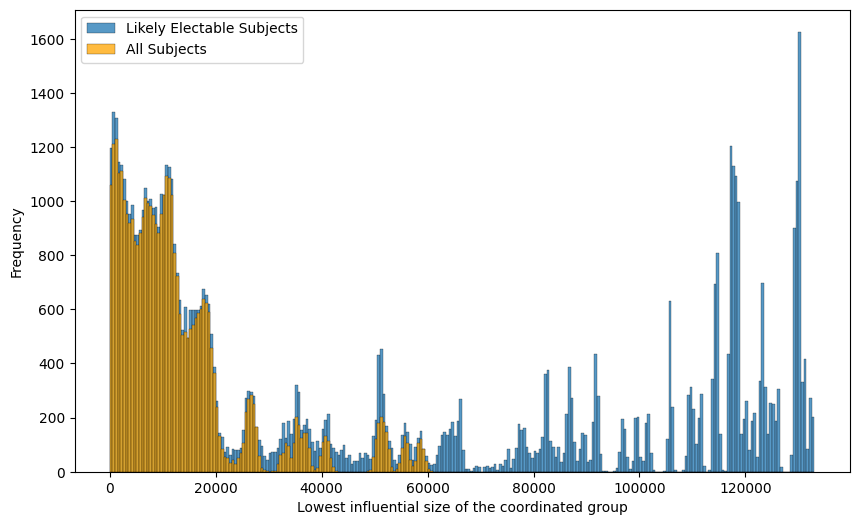

 Likely electable. Mean: 13053, Std Dev: 12568
 All. Mean: 49932, Std Dev: 47899
 Not likely electable. Mean: 94081, Std Dev: 35698


In [11]:
data_min = min(cumulative_data_all.min(), cumulative_data.min())
data_max = max(cumulative_data_all.max(), cumulative_data.max())

# Define consistent bin edges
bin_width = 500  # Adjust bin width as needed
bin_edges = np.arange(data_min, data_max + bin_width, bin_width)

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot histogram for array1
sns.histplot(cumulative_data_all, bins=bin_edges, label='Likely Electable Subjects')

# Plot histogram for array2 with a different color
sns.histplot(cumulative_data, bins=bin_edges, color='orange', label='All Subjects')

plt.xlabel('Lowest influential size of the coordinated group')
plt.ylabel('Frequency')
plt.legend()
plt.show()

cumulative_mean = np.mean(cumulative_data)
cumulative_std_dev = np.std(cumulative_data)

print(f" Likely electable. Mean: {cumulative_mean:.0f}, Std Dev: {cumulative_std_dev:.0f}")

cumulative_mean = np.mean(cumulative_data_all)
cumulative_std_dev = np.std(cumulative_data_all)

print(f" All. Mean: {cumulative_mean:.0f}, Std Dev: {cumulative_std_dev:.0f}")

cumulative_mean = np.mean(cumulative_data_non_el)
cumulative_std_dev = np.std(cumulative_data_non_el)

print(f" Not likely electable. Mean: {cumulative_mean:.0f}, Std Dev: {cumulative_std_dev:.0f}")


In [12]:
# years = ["2023", "2020", "2016", "2012", "2010", "2006", "2002", "1998", "1994"]
# db_file = "lowest_samples_complete.db"

# conn = sqlite3.connect(db_file)
# cur = conn.cursor()

# for year in years:
#     cur.execute(f'''
#     SELECT
#       total_rows,
#       selected_rows,
#       (selected_rows * 100.0 / total_rows) AS percentage
#     FROM (
#       SELECT
#         (SELECT COUNT(*) FROM tab{year}) AS total_rows,
#         (SELECT COUNT(*) FROM tab{year} WHERE diff > 0) AS selected_rows
#     )
#     ''')
#     results = cur.fetchall()
#     print(f'Year {year} : {results}')


# conn.commit()
# conn.close()

'''
Year 2023 : [(390000000, 139608347, 35.79701205128205)]
Year 2020 : [(375000000, 184957456, 49.321988266666665)]
Year 2016 : [(360000000, 147023553, 40.83987583333333)]
Year 2012 : [(405000000, 136175804, 33.62365530864197)]
Year 2010 : [(285000000, 215887319, 75.74993649122807)]
Year 2006 : [(330000000, 129116568, 39.12623272727273)]
Year 2002 : [(390000000, 130509343, 33.4639341025641)]
Year 1998 : [(270000000, 87096479, 32.25795518518518)]
Year 1994 : [(270000000, 120306765, 44.55806111111111)]
'''


'\nYear 2023 : [(390000000, 139608347, 35.79701205128205)]\nYear 2020 : [(375000000, 184957456, 49.321988266666665)]\nYear 2016 : [(360000000, 147023553, 40.83987583333333)]\nYear 2012 : [(405000000, 136175804, 33.62365530864197)]\nYear 2010 : [(285000000, 215887319, 75.74993649122807)]\nYear 2006 : [(330000000, 129116568, 39.12623272727273)]\nYear 2002 : [(390000000, 130509343, 33.4639341025641)]\nYear 1998 : [(270000000, 87096479, 32.25795518518518)]\nYear 1994 : [(270000000, 120306765, 44.55806111111111)]\n'

In [13]:
# years = ["2023", "2020", "2016", "2012", "2010", "2006", "2002", "1998", "1994"]
# db_file = "lowest_samples_complete.db"

# conn = sqlite3.connect(db_file)
# cur = conn.cursor()

# for year in years:
#     cur.execute(f'''
#     SELECT
#       total_rows,
#       selected_rows,
#       (selected_rows * 100.0 / total_rows) AS percentage
#     FROM (
#       SELECT
#         ( SELECT COUNT(*)
#             FROM tab{year} 
#              GROUP BY samples) AS total_rows,
#         ( SELECT COUNT(*)
#              FROM tab{year} 
#              WHERE diff > 0 
#              GROUP BY samples
#         ) AS selected_rows
#     )
#     ''')
#     results = cur.fetchall()
#     print(f'Year {year} : {results}')


# conn.commit()
# conn.close()
# '''
# Year 2023 : [(30000, 29393, 97.97666666666667)]
# Year 2020 : [(30000, 16654, 55.513333333333335)]
# '''

Year 2023 - Mean: 29603, Std Dev: 39794
Year 2020 - Mean: 22106, Std Dev: 25975
Year 2016 - Mean: 56380, Std Dev: 55672
Year 2012 - Mean: 83913, Std Dev: 50834
Year 2010 - Mean: 26231, Std Dev: 19204
Year 2006 - Mean: 75641, Std Dev: 48059
Year 2002 - Mean: 47173, Std Dev: 44848
Year 1998 - Mean: 20580, Std Dev: 24621
Year 1994 - Mean: 37919, Std Dev: 33768


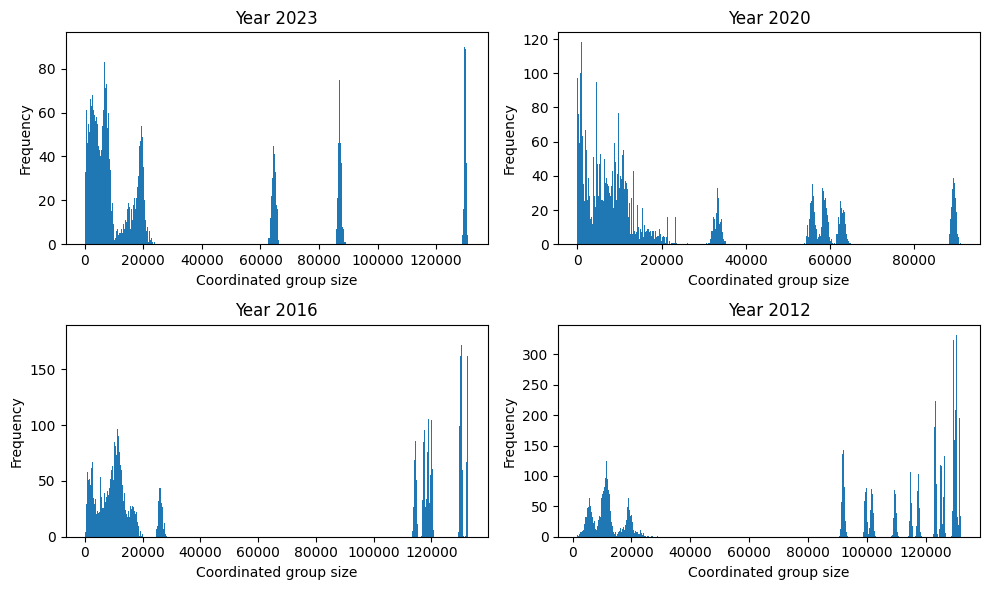

 Mean: 49932, Std Dev: 47899


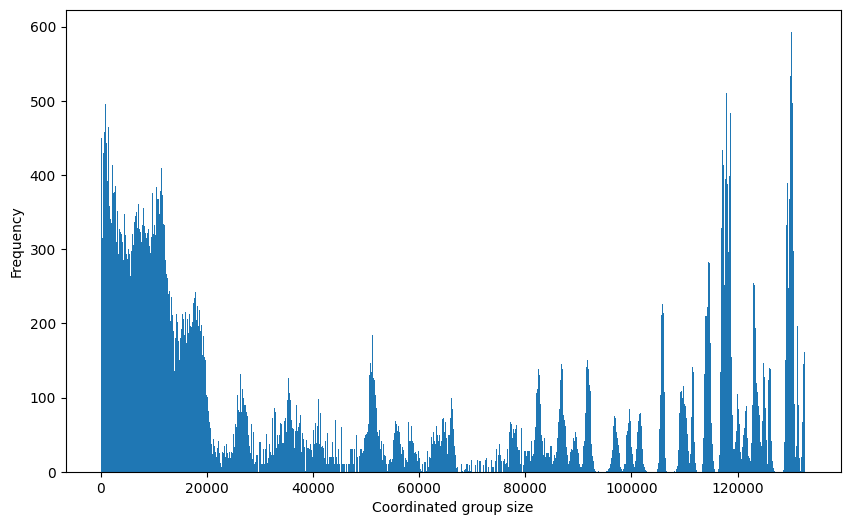

In [14]:
years = ["2023", "2020", "2016", "2012", "2010", "2006", "2002", "1998", "1994"]

cumulative_data = []

fig, axs = plt.subplots(2, 2, figsize=(10, 6))

axs = axs.ravel()

for i, year in enumerate(years):
    i
    df = pd.read_csv(f'./db_exports/lowest_samples{year}all.csv', header=0)
    df["lowest_samples"] = df["lowest_samples"] * (constants.all_voters[int(year)]/ 1000000)
    
    cumulative_data.extend(df.iloc[:, 2])

    mean_value = np.mean(df.iloc[:, 2])
    std_dev = np.std(df.iloc[:, 2])

    try:
        axs[i].hist(df.iloc[:, 2], bins=800)
        
        axs[i].set_xlabel('Coordinated group size')
        axs[i].set_ylabel('Frequency')
        axs[i].set_title(f'Year {year}')

    except IndexError:
        pass

    print(f"Year {year} - Mean: {mean_value:.0f}, Std Dev: {std_dev:.0f}")


plt.tight_layout()  # Adjust subplot spacing for better visibility
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(cumulative_data, bins=800)
plt.xlabel('Coordinated group size')
plt.ylabel('Frequency')

cumulative_mean = np.mean(cumulative_data)
cumulative_std_dev = np.std(cumulative_data)

print(f" Mean: {cumulative_mean:.0f}, Std Dev: {cumulative_std_dev:.0f}")

plt.show()


In [15]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np
# from scipy import stats

# years = ["2023", "2020", "2016", "2012", "2010", "2006", "2002", "1998", "1994"]

# # Define a function to calculate confidence interval
# def confidence_interval(data, confidence=0.95):
#     n = len(data)
#     mean, std_err = np.mean(data), stats.sem(data)
#     margin_err = std_err * stats.t.ppf((1 + confidence) / 2, n - 1)
#     return mean, margin_err

# for year in years:
#     df = pd.read_csv(f'lowest_samples{year}.csv', header=0)

#     # Boxplot
#     plt.figure(figsize=(8, 6))
#     sns.boxplot(data=df.iloc[:, 2])
#     plt.xlabel('Third Column')
#     plt.title(f'Boxplot of the {year}')
#     plt.show()

#     # Calculate average, confidence interval, and dispersion
#     avg = np.mean(df.iloc[:, 2])
#     conf_interval = confidence_interval(df.iloc[:, 2])
#     dispersion = np.var(df.iloc[:, 2])

#     print(f'Year: {year}')
#     print(f'Average: {avg}')
#     print(f'Confidence Interval (95%): {conf_interval[0]} ± {conf_interval[1]}')
#     print(f'Dispersion (Variance): {dispersion}')
#     print('---------------------------------------')


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(f'lowest_samples2020-p12.csv', header=0)

plt.hist(df.iloc[:, 2], bins=200)
plt.xlabel('Third Column')
plt.ylabel('Frequency')
plt.title(f'Histogram of the 2020 subject 12')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'lowest_samples2020-p12.csv'

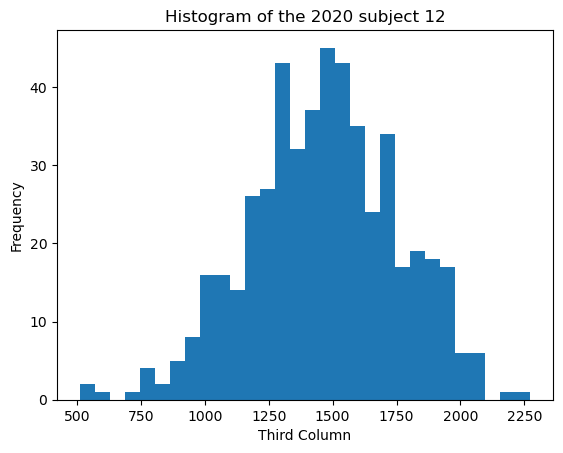

Kolmogorov-Smirnov Test Statistic: 1.0
P-value: 0.0
Average: 1466.236
Dispersion: 290.90007271226295
Confidence Interval (95%): [1440.7374843800255, 1491.7345156199747]
Kolmogorov-Smirnov Test Statistic: 1.0
P-value: 0.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kstest
import numpy as np

# Load the data
df = pd.read_csv('lowest_samples2020-p12.csv')

# Extract the third column
data = df.iloc[:, 2]

# Plot histogram
plt.hist(data, bins=30)
plt.xlabel('Third Column')
plt.ylabel('Frequency')
plt.title('Histogram of the 2020 subject 12')
plt.show()

# Perform Kolmogorov-Smirnov test for normality
ks_statistic, p_value = kstest(data, 'norm')


# Calculate average and dispersion
average = np.mean(data)
dispersion = np.std(data)

# Calculate confidence intervals
confidence_interval_lower = average - 1.96 * (dispersion / np.sqrt(len(data)))
confidence_interval_upper = average + 1.96 * (dispersion / np.sqrt(len(data)))

# Print results
print(f'Kolmogorov-Smirnov Test Statistic: {ks_statistic}')
print(f'P-value: {p_value}')
print(f'Average: {average}')
print(f'Dispersion: {dispersion}')
print(f'Confidence Interval (95%): [{confidence_interval_lower}, {confidence_interval_upper}]')

# Perform Kolmogorov-Smirnov test for logistic distribution
ks_statistic, p_value = kstest(data, 'laplace')

# Print results
print(f'Kolmogorov-Smirnov Test Statistic: {ks_statistic}')
print(f'P-value: {p_value}')


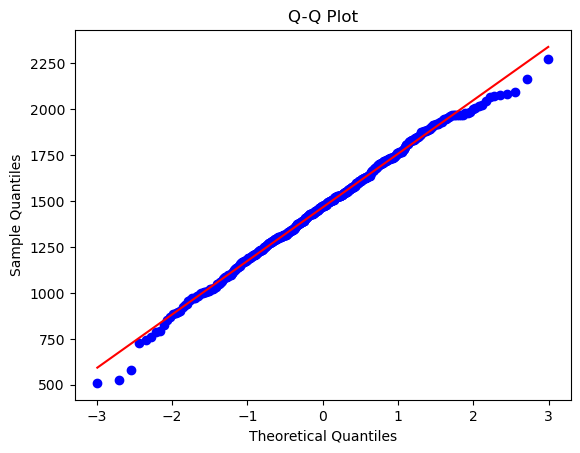

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Load the data
df = pd.read_csv('lowest_samples2020-p12.csv')

# Extract the third column
data = df.iloc[:, 2]

# Create Q-Q plot
stats.probplot(data, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()


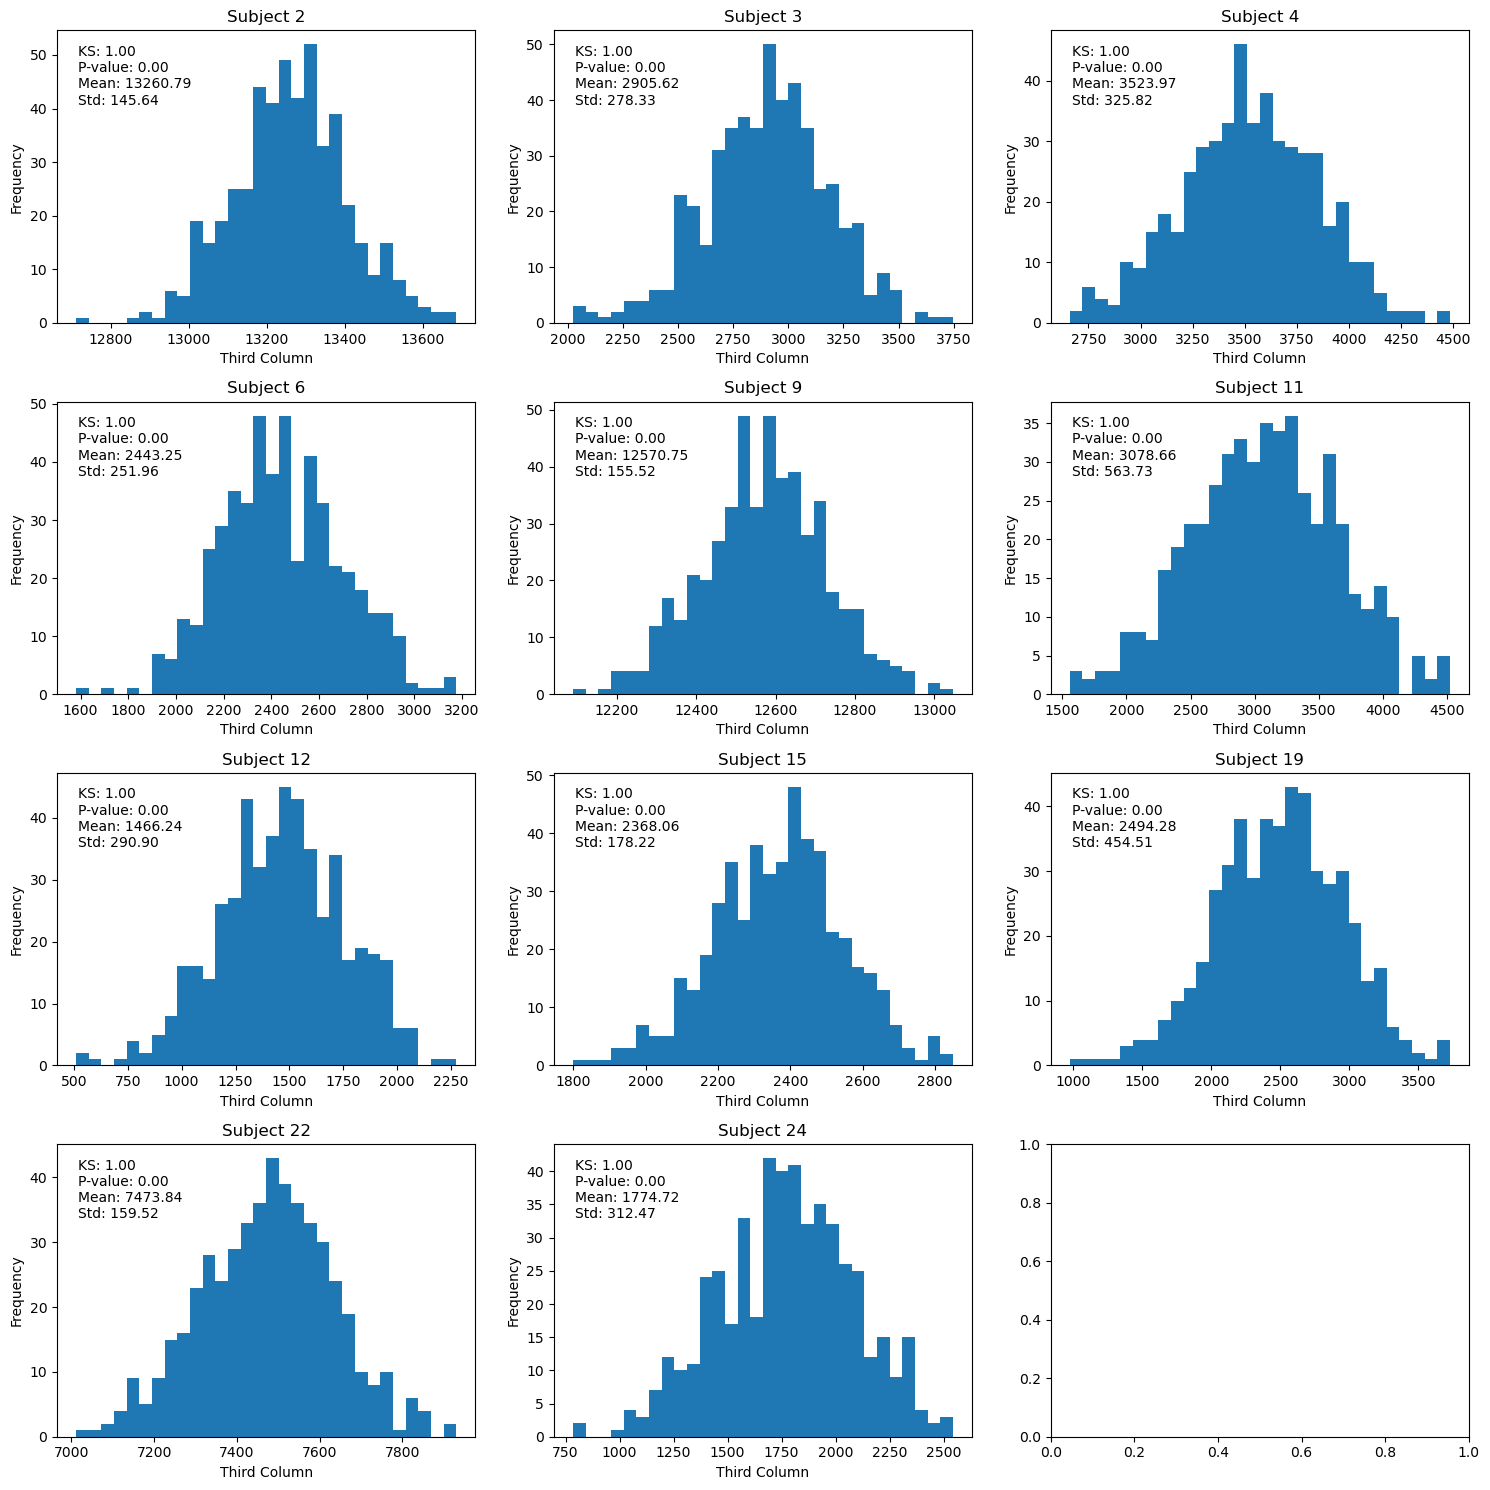

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kstest
import numpy as np

# Create a figure and axis object for subplots
fig, axs = plt.subplots(4, 3, figsize=(15, 15))

for subject, ax in zip(set(x if x not in (1, 5, 7, 8, 10, 13, 14, 16, 17, 18, 20, 21, 23, 25) else 12 for x in range(1, 26)), axs.flatten()):
    df = pd.read_csv(f'lowest_samples2020-p{subject}.csv')

    data = df.iloc[:, 2]

    ax.hist(data, bins=30)
    ax.set_xlabel('Third Column')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Subject {subject}')

    ks_statistic, p_value = kstest(data, 'norm')

    average = np.mean(data)
    dispersion = np.std(data)

    confidence_interval_lower = average - 1.96 * (dispersion / np.sqrt(len(data)))
    confidence_interval_upper = average + 1.96 * (dispersion / np.sqrt(len(data)))

    ax.text(0.05, 0.95, f'KS: {ks_statistic:.2f}\nP-value: {p_value:.2f}\nMean: {average:.2f}\nStd: {dispersion:.2f}', transform=ax.transAxes, verticalalignment='top')

plt.tight_layout()
plt.show()
